# LKIF
Created on Mon Sep  7 16:26:22 2020 

@Author: X. San Liang    @ sanliang@courant.nyu.edu
        
@Maintainer: Yineng Rong @ yinengrong@foxmail.com

## About the module
Causal analysis, a fundamental aspect in various disciplines, has consistently garnered significant attention from the scientific community. In recent years, it has been recognized as a promising approach to explaining and generalizing deep learning. However, the incorporation of causality into the artificial intelligence algorithms poses challenges such as ambiguity, non-quantifiability, and computational inefficiency. Over the past two decades (Liang and Kleeman, 2005), substantial progress has been made in addressing these challenges through the development of a **quantitative causal theory — the Liang information flow theory**. This rigorous theory, derived from first principles, has resulted in notable scientific discoveries in fields ranging from finance, neuroscience, and artificial intelligence to climate science and oceanography. This module provides a practical implementation of the theory, complete with core code and selected examples.

[![License](https://img.shields.io/badge/license-MIT-blue.svg)](https://github.com/YinengRong/LKIF/blob/main/LICENSE)

# Requirements
* numpy
* scipy

# Installation
 pip install LK_Info_flow

In [1]:
from LK_Info_Flow import multi_causality_est


# case 1 (bivariate causality):

In [2]:
# case 1 (bivariate causality):
import numpy as np
np.random.seed(0)  
from LK_Info_Flow import multi_causality_est
#import matplotlib.pyplot as plt

#generate dataset
a11=0.3;a12=-0.4;a22=0.7;a21=0;b1=0.5;b2=0.5;
x=np.zeros([10000,])
y=np.zeros([10000,])
x[0]=0.4;y[0]=0.3;
for i in range(10000-1):
    x[i+1]=a11*x[i]+a21*y[i]+b1*np.random.normal();
    y[i+1]=a12*x[i]+a22*y[i]+b2*np.random.normal();

#print the structure of system
print ("x(i+1)=%.2f * x(i) + %.2f * y(i) + %.2f W" % (a11, a21,b1))
print ("y(i+1)=%.2f * x(i) + %.2f * y(i) + %.2f W" % (a12, a22,b2))


#initialization
X=np.ones((2,10000));
X[0]=x;X[1]=y;
X=np.loadtxt('E:\\BaiduSyncdisk\\papers\\author\\package\\R\\case1_data.txt')
#calculate the causality
causal_graph=multi_causality_est(X[:,200:]);


#information flow
IF=np.squeeze(causal_graph.get('IF'));

#normalized information flow
nIF=np.squeeze(causal_graph.get('nIF'));

#significant test 
e99=np.squeeze(causal_graph.get('err_e99'));

## plot heatmap
# print(nIF[0,1])
# plt.matshow(nIF, 0,cmap='RdYlGn',vmin=-0.01,vmax=0.01)


# show the results
if abs(IF[0,1])>e99[0,1]:
    print('y -> x precent:%5.2f' % (nIF[0,1]*100)+'%')
else:
    print('y not -> x')


if abs(IF[1,0])>e99[1,0]:
    print('x -> y percent:%5.2f' % (nIF[1,0]*100)+'%')
else:
    print('x not -> y')


x(i+1)=0.30 * x(i) + 0.00 * y(i) + 0.50 W
y(i+1)=-0.40 * x(i) + 0.70 * y(i) + 0.50 W
y not -> x
x -> y percent: 5.52%


# case 2 (multivariate causality):

In [3]:
# case 2 (multivariate causality):
import numpy as np
np.random.seed(0)  


# generate dataset
a11=0;   a21=0;   a31=-0.6;  a41=0;   a51=-0.0;  a61=0;   b1=0.1;
a12=-0.5;a22=0;   a32=-0.0;  a42=0;   a52=0.0;   a62=0.8; b2=0.7;
a13=0;   a23=0.7; a33=-0.6;  a43=0;   a53=-0.0;  a63=0;   b3=0.5;
a14=0;   a24=0;   a34=-0.;   a44=0.7; a54=0.4;   a64=0;   b4=0.2;
a15=0;   a25=0;   a35=0;     a45=0.2; a55=0.0;   a65=0.7; b5=0.8;
a16=0;   a26=0;   a36=0;     a46=0;   a56=0.0;   a66=-0.5;b6=0.3;

M=6;
xx=np.zeros([100001,M])
xx[0]=np.array([0.4,0.5,0.6,0.7,0.6,0.7])
for i in range(100000):
    xx[i+1,0]=a11*xx[i,0]+a21*xx[i,1]+a31*xx[i,2]+a41*xx[i,3]+a51*xx[i,4]+a61*xx[i,5]+b1+np.random.normal();
    xx[i+1,1]=a12*xx[i,0]+a22*xx[i,1]+a32*xx[i,2]+a42*xx[i,3]+a52*xx[i,4]+a62*xx[i,5]+b2+np.random.normal();
    xx[i+1,2]=a13*xx[i,0]+a23*xx[i,1]+a33*xx[i,2]+a43*xx[i,3]+a53*xx[i,4]+a63*xx[i,5]+b3+np.random.normal();
    xx[i+1,3]=a14*xx[i,0]+a24*xx[i,1]+a34*xx[i,2]+a44*xx[i,3]+a54*xx[i,4]+a64*xx[i,5]+b4+np.random.normal();
    xx[i+1,4]=a15*xx[i,0]+a25*xx[i,1]+a35*xx[i,2]+a45*xx[i,3]+a55*xx[i,4]+a65*xx[i,5]+b5+np.random.normal();
    xx[i+1,5]=a16*xx[i,0]+a26*xx[i,1]+a36*xx[i,2]+a46*xx[i,3]+a56*xx[i,4]+a66*xx[i,5]+b6+np.random.normal();
#np.savetxt('data/case2_data.txt',xx)

##------calculate the causality---------------------------------
xx=np.loadtxt('data/case2_data.txt')
xx=xx[10000:].T;
from LK_Info_Flow import multi_causality_est
cau2=multi_causality_est(X=xx)#X [ndim,ntime_steps]


#information flow from column to raw
IF = np.squeeze(cau2['IF']) 
#normalized information flow
nIF= np.squeeze(cau2.get('nIF'));
#significant test: confidence levels of 90/95/99% err_e90/err_e95/err_e99;
err= np.squeeze(cau2.get('err_e99'));
#significant test (p-value)
p=np.squeeze(cau2.get('p'));

##---------causal graph---------------------------------------
from LK_Info_Flow.plot_causality import causal_graph 
causal_graph(causal_matrix=nIF,  name='causal_structure_case2')




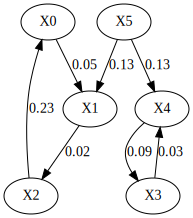

In [9]:
from graphviz import Source 
dot=Source.from_file('causal_structure_case2.dot')
dot


# case 3(panel data, discontinuous time series or ensemble data):
## 3.1

In [10]:
# case 3(panel data, discontinuous time series or ensemble data):
## 3.1________________________________________________
import numpy as np
from LK_Info_Flow import multi_causality_est
import time
from tqdm import tqdm 


# generate data
a11=0.3;a21=0;  a31=0;  a41=0;  b1=0.4;
a12=0.5;a22=0.7;a32=0.1;a42=0;  b2=0.5;
a13=0;  a23=0.3;a33=0.5;a43=0;  b3=0.6;
a14=0.2;a24=0.4;a34=0.3;a44=0.1;b4=0.3;
case_num=1000;
xx=np.zeros([case_num,1001,4])
xx[:,0,:]=np.array([0.4,0.5,0.6,0.7])
print('----------generating the data----------')
for icase in tqdm(range(case_num)):
    if icase!=0:
        xx[icase,0,:]=xx[icase,0,:]+np.random.normal(0,1,4)
    for i in range(1000):
        xx[icase,i+1,0]=a11*xx[icase,i,0]+a21*xx[icase,i,1]+a31*xx[icase,i,2]+a41*xx[icase,i,3]+b1*np.random.normal();
        xx[icase,i+1,1]=a12*xx[icase,i,0]+a22*xx[icase,i,1]+a32*xx[icase,i,2]+a42*xx[icase,i,3]+b2*np.random.normal();
        xx[icase,i+1,2]=a13*xx[icase,i,0]+a23*xx[icase,i,1]+a33*xx[icase,i,2]+a43*xx[icase,i,3]+b3*np.random.normal();
        xx[icase,i+1,3]=a14*xx[icase,i,0]+a24*xx[icase,i,1]+a34*xx[icase,i,2]+a44*xx[icase,i,3]+b4*np.random.normal();


# build the panel data
## Select a segment of 10 time length for each case and combine it into panel data
## and build the corresponding temperal index
X = np.zeros([10*case_num,4]);
t = np.zeros([10*case_num,]);
for j in range(case_num):
    i=int(np.floor(np.random.uniform()*case_num));
    X[10*j:10*(j+1),:]=xx[i,-10:,:];
    t[10*j:10*(j+1),]=np.linspace(0,9,10);


#X=np.loadtxt('E:\\BaiduSyncdisk\\papers\\author\\package\\R\\case3_data_X.txt')
#t=np.loadtxt('E:\\BaiduSyncdisk\\papers\\author\\package\\R\\case3_data_t.txt')
#calculate the causality (panel data)
print('start calculate causality:')
time_start=time.time()
IF_panel=multi_causality_est(X=X[:,:4].T,series_temporal_order=t)

T21=IF_panel.get('IF').squeeze()
err=IF_panel.get('err_e90').squeeze()
time_end=time.time()
print('est_panel: T1->2: %8.4f e90: %8.4f'%(T21[1,0], err[1,0]))
print('est_panel: T2->1: %8.4f e90: %8.4f'%(T21[0,1], err[0,1]))
print('time cost: %8.4f s'%(time_end-time_start))


#calculate the causality in one case 
time_start=time.time()
IF_time_series=multi_causality_est(X=xx[1,:,:].T)
T21=IF_time_series.get('IF').squeeze()
err=IF_time_series.get('err_e99').squeeze()
time_end=time.time()
print('est_time_series: T1->2: %8.4f e90: %8.4f'%(T21[1,0], err[1,0]))
print('est_time_series: T2->1: %8.4f e90: %8.4f'%(T21[0,1], err[0,1]))
print('time cost: %8.4f s'%(time_end-time_start))



----------generating the data----------


100%|██████████| 1000/1000 [00:07<00:00, 133.51it/s]

start calculate causality:
est_panel: T1->2:   0.0256 e90:   0.0011
est_panel: T2->1:   0.0021 e90:   0.0023
time cost:   0.0046 s
est_time_series: T1->2:   0.0291 e90:   0.0056
est_time_series: T2->1:  -0.0040 e90:   0.0126
time cost:   0.0010 s


## 3.2 
For time series data with missing measurements in time or a set of ensemble data, we need to provide an additional time corresponding to each data point (set the parameter "series_temporal_order")

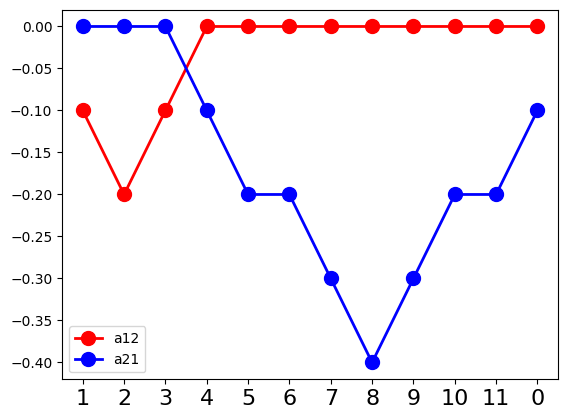

100%|██████████| 100/100 [00:06<00:00, 16.24it/s]

Ground truth is: X2->X1
IF(panel)
[[-0.61 -0.05  0.  ]
 [-0.   -1.9   0.  ]
 [-0.    0.   -0.6 ]]
IF(temperal)
[[-0.77 -0.04 -0.01]
 [ 0.03 -1.62 -0.02]
 [ 0.   -0.   -0.8 ]]
normalized IF(panel)
[[-0.49 -0.04  0.  ]
 [-0.   -0.94  0.  ]
 [-0.    0.   -0.5 ]]
normalized IF(temperal)
[[-0.38 -0.02 -0.01]
 [ 0.01 -0.77 -0.01]
 [ 0.   -0.   -0.4 ]]
p-value(panel)
[[0.   0.   0.38]
 [0.37 0.   0.31]
 [0.35 0.39 0.  ]]
p-value(temperal)
[[0.   0.   0.42]
 [0.05 0.   0.11]
 [0.46 0.49 0.  ]]
effect size(panel)
[[0.52 0.32 0.04]
 [0.04 6.26 0.04]
 [0.04 0.04 0.51]]
effect size(temperal)
[[0.44 0.13 0.02]
 [0.07 1.94 0.05]
 [0.02 0.02 0.47]]
structure Hanming Distance(panel)
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
structure Hanming Distance(time_series)
[[0. 8. 0.]
 [9. 0. 2.]
 [0. 0. 0.]]


In [11]:
## 3.2 ___________________________________________________________________________________________________________
#For time series data with missing measurements in time or a set of ensemble data, we need to provide an additional time corresponding to each data point (set the parameter "series_temporal_order")


# -*- coding: utf-8 -*-
"""
Created on Wed Sep 13 08:37:30 2023

@author: Yinen
"""

import numpy as np
from LK_Info_Flow import multi_causality_est
import scipy.io as sio 
from tqdm import tqdm
NT = 12000


# delay cyclic causal structure
AT = np.zeros((3, 3, 12))
for i in range(3):
    AT[i,i,:]=0.4
AT[1, 1, :] = -0.9
AT[0, 1, 0] = -0.1
AT[0, 1, 1] = -0.2
AT[0, 1, 2] = -0.1

AT[1, 0, 3] = -0.1
AT[1, 0, 4] = -0.2
AT[1, 0, 5] = -0.2

AT[1, 0, 6] = -0.3
AT[1, 0, 7] = -0.4
AT[1, 0, 8] = -0.3

AT[1, 0, 9] = -0.2
AT[1, 0, 10] = -0.2
AT[1, 0, 11] = -0.1

#plot the cyclic element A12 and A21
import matplotlib.pyplot as plt
x1=np.squeeze(AT[0,1,:])
x2=np.squeeze(AT[1,0,:])
plt.plot(x1, marker='o', markeredgecolor='r', markersize=10, linewidth=2, color='r')
plt.plot(x2, marker='o', markeredgecolor='b', markersize=10, linewidth=2, color='b')
plt.legend(['a12', 'a21'])
plt.xticks(range(0,12), [str(i) for i in range(1,12)] + ['0'], fontsize=16)
plt.xlim([-0.5, 11.5])
plt.show()



### repeat the experiment 100 time
B = np.eye(3) * 0.3 + np.ones((3, 3)) * 0.3
X = np.zeros((3, NT+1200))
NIF=[];P=[];SEIF=[];IFs=[];
NIF1=[];P1=[];SEIF1=[];IFs1=[];
for in_ in tqdm(range(1, 101)):

##Exclude the first 1200 time steps and select the stable time seires for information flow calculation.
    vt = 1200
    for it in range(1, NT+vt):
        X[:, it] = np.dot(AT[:, :, (it+2) % 12].T, X[:, it-1]) + np.dot(B, np.random.randn(3, 1)).T

    nn = X.shape
    
    N = X[:, 1201::12].shape
    
    xx = np.zeros((3, N[1]*2))
    t = np.zeros((1, N[1]*2))

# select Feb and Mar
    for i in range(3):
        xx[i, :] = np.reshape(np.array([X[i, 1200::12], X[i, 1201::12]]).T, (1, N[1]*2))
    t = np.reshape(np.array([np.arange(1200,nn[1],12), np.arange(1201,nn[1],12)]).T, (1, N[1]*2))

## information flow for panel data    
    IF=multi_causality_est(X=xx,series_temporal_order=t)
    NIF.append(IF['nIF'])
    P.append(IF['p'])
    SEIF.append(IF['SEIF'])
    IFs.append(IF['IF'])
## information flow for temperal data        
    IF=multi_causality_est(X=xx)
    NIF1.append(IF['nIF'])
    P1.append(IF['p'])
    SEIF1.append(IF['SEIF'])
    IFs1.append(IF['IF'])

# list-> numpy.array
NIF=np.array(NIF);NIF1=np.array(NIF1);
IFs=np.array(IFs);IFs1=np.array(IFs1);
P=np.array(P);P1=np.array(P1);
SEIF=np.array(SEIF);SEIF1=np.array(SEIF1);

print('Ground truth is: X2->X1')
## outputs
#average IF
print('IF(panel)')
mean_IF=np.squeeze(np.average(IFs,axis=0))
print(np.around(mean_IF,2))
print('IF(temperal)')
mean_IF1=np.squeeze(np.average(IFs1,axis=0))
print(np.around(mean_IF1,2))

#average nIF
print('normalized IF(panel)')
mean_NIF=np.squeeze(np.average(NIF,axis=0))
print(np.around(mean_NIF,2))
print('normalized IF(temperal)')
mean_NIF1=np.squeeze(np.average(NIF1,axis=0))
print(np.around(mean_NIF1,2))

#average p-value
print('p-value(panel)')
mean_P=np.squeeze(np.average(P,axis=0))
print(np.around(mean_P,2))
print('p-value(temperal)')
mean_P1=np.squeeze(np.average(P1,axis=0))
print(np.around(mean_P1,2))

#average effect size
print('effect size(panel)')
mean_E=np.average(np.squeeze(np.abs(IFs / SEIF / np.sqrt(1000-3))),axis=0)
print(np.around(mean_E,2))
key=(mean_E[0,1]+mean_E[1,0])/2
print('effect size(temperal)')
mean_E1=np.average(np.squeeze(np.abs(IFs1 / SEIF1 / np.sqrt(2000-3-1))),axis=0)
print(np.around(mean_E1,2))
key1=(mean_E1[0,1]+mean_E1[1,0])/2

A = np.eye(3)
A[0, 1] = 1
sum_val = np.sum(np.abs(A-np.squeeze(np.abs(IFs / SEIF / np.sqrt(1000-3)) >key)), axis=0)
print('structure Hanming Distance(panel)')
print(sum_val)

sum_val = np.sum(np.abs(A-np.squeeze(np.abs(IFs1 / SEIF1 / np.sqrt(2000-3-1)) >key1)), axis=0)
print('structure Hanming Distance(time_series)')
print(sum_val)
    
    
    

# case 4 (subsystems):

In [12]:
# case 4 (subsystems):
import numpy as np
from LK_Info_Flow import causality_subspace


#generate dataset
a11=-0.5;a21= 0.5;a31= 0.2; b1=1.0;
a12= 0.0;a22=-0.2;a32=-0.6; b2=1.0;
a13=-0.2;a23= 0.4;a33=-0.2; b3=1.0;

b11=-0.2;b21=-0.5;b31= 0.0; b4=1.0;
b12= 0.5;b22=-0.6;b32= 0.4; b5=1.0;
b13=-0.1;b23=-0.4;b33=-0.5; b6=1.0;

esp1=0.5
esp3=0.0


xx=np.zeros([20001,6])
xx[0,:]=np.array([0.5,0.5,0.5,0.5,0.5,0.5])
for i in range(20000):
    xx[i+1,0]=a11*xx[i,0]+a21*xx[i,1]+a31*xx[i,2]+b1*np.random.normal();
    xx[i+1,1]=a12*xx[i,0]+a22*xx[i,1]+a32*xx[i,2]+b2*np.random.normal();
    xx[i+1,2]=a13*xx[i,0]+a23*xx[i,1]+a33*xx[i,2]+b3*np.random.normal()+esp3*xx[i,5];
    xx[i+1,3]=b11*xx[i,3]+b21*xx[i,4]+b31*xx[i,5]+b1*np.random.normal()-esp1*xx[i,0];
    xx[i+1,4]=b12*xx[i,3]+b22*xx[i,4]+b32*xx[i,5]+b2*np.random.normal();
    xx[i+1,5]=b13*xx[i,3]+b23*xx[i,4]+b33*xx[i,5]+b3*np.random.normal();
#_________________________________________________________________________________


#calculate the causality
ind=[3,6]; #X0,X1,X2 subsystem A;X3,X4,X5 subsystem B
IF_g=causality_subspace(xx=xx,ind=ind)
print('TA->B: %8.4f  TB->A: %8.4f'%(IF_g['TAB'],IF_g['TBA']))

TA->B:  -0.1237  TB->A:  -0.0013


# case 5 (takens' theorem):

In [13]:
# case 5 (time delay):
import numpy as np
from LK_Info_Flow import multi_causality_est
from LK_Info_Flow.plot_causality import causal_graph 

#generate data
xx=np.zeros([20000,5])
xx[:4,:]=np.random.normal(size=(4,5));
for i in range(4,20000-1):
    xx[i+1,0]=-0.95*np.sqrt(2)*xx[i,0]-0.9025*xx[i-1,0]+np.random.normal();
    xx[i+1,1]= 0.5*xx[i-1,0]+np.random.normal();
    xx[i+1,2]=-0.4*xx[i-2,0]+np.random.normal();
    xx[i+1,3]=-0.5*xx[i-1,0]+0.25*np.sqrt(2)*xx[i,3]+0.25*np.sqrt(2)*xx[i,4]+np.random.normal();
    xx[i+1,4]=-0.25*np.sqrt(2)*xx[i,3]+0.25*np.sqrt(2)*xx[i,4]+np.random.normal();
    
#np.savetxt('data/case5_data.txt',xx)

# Figure 2
xx=np.loadtxt('data/case5_data.txt')
xx1=np.zeros([20000-1000,7])
xx1[:,:5]=xx[1000:]
xx1[:,5]=xx[(1000-1):-1,0]#X5=X0[t-1]
xx1[:,6]=xx[(1000-2):-2,0]#X6=X0[t-2]

IF_0=multi_causality_est(X=xx1.T)
# exclude the fake causality from X(t+n) to X(t) (n>0)
a=IF_0['nIF']+0;
b=IF_0['p']+0;
a[5:,:,:]=0;
b[5:,:,:]=1;
#__________________________plot causal structure___________________________
causal_graph(causal_matrix=a,  significance=b,name='causal_structure_case5')



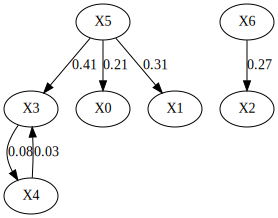

In [14]:
from graphviz import Source 
dot=Source.from_file('causal_structure_case5.dot')
dot



# case 6 (Large scale computing cost):

In [64]:
# case 6 (Large scale computing cost):
import time
from tqdm import tqdm
import numpy as np
from LK_Info_Flow import multi_causality_est

#generate data
NN=[200,1000,5000,10000]  #time steps
MM=[10,50,100]  #var numbers
nlag=0; #time delay
for iN in range(3):
    N=NN[iN];#time steps
    for iM in range(3):
        M=MM[iM];# varilabe number
        jj=0;
        tcost=[];IF=[];A_gt=[]
        print([iN,iM])
        for icase in tqdm(range(100)):
        
            b=(np.random.randint(4)+1)/20;

            max_x=10 #if x >10 then regard the model is unstable
            while max_x>=10:
                A=np.random.normal(size=(M,M));
                A[np.where(A<1)]=0;
                A[np.where(A>=1)]=0.2;
                A=A*(1-np.eye(M,M))+0.2*np.eye(M,M);
                tmp=np.ones((len(A[np.where(A==0.2)]),))
                tmp[::2]=-tmp[::2]
                A[np.where(A==0.2)]=A[np.where(A==0.2)]*tmp

                xx=np.zeros([N+1,M])
                xx[0,:]=np.random.normal(size=(M,))/2;
                for i in range(N):
                    xx[i+1]=np.dot(A,xx[i])+b*np.random.normal(size=(M,));
                #max_x=np.max(abs(xx));
                if np.isnan(np.max(abs(xx))):
                    print(jj)
                    max_x=10
                    jj=jj+1;
                else:
                    max_x=np.max(abs(xx))
#initialization
            xx1=np.zeros([N-nlag,M+M*nlag])
            xx1[:,:M]=xx[:N-nlag,:];
            for i in range(nlag):
                xx1[:,(1+i)*M:(2+i)*M]=xx[i+1:N-nlag+i+1,:]
#calculate information flow            
            ts=time.time()
            cau=multi_causality_est(X=xx1.T);
            #T21=cau;
            te=time.time()
            tcost.append(te-ts)
            IF.append(cau)
            A_gt.append(A)
#save results
        np.savez('result_%04d_%04d.npz'%(M,N), **{'A':A_gt, 'IF':IF, 'tcost':tcost})




[0, 0]


100%|██████████| 100/100 [00:00<00:00, 885.24it/s]


[0, 1]


100%|██████████| 100/100 [00:00<00:00, 133.17it/s]


[0, 2]


100%|██████████| 100/100 [00:06<00:00, 15.14it/s]


[1, 0]


100%|██████████| 100/100 [00:00<00:00, 265.08it/s]


[1, 1]


100%|██████████| 100/100 [00:02<00:00, 35.24it/s]


[1, 2]


100%|██████████| 100/100 [00:18<00:00,  5.29it/s]


[2, 0]


100%|██████████| 100/100 [00:01<00:00, 55.20it/s]


[2, 1]


100%|██████████| 100/100 [00:05<00:00, 18.18it/s]


[2, 2]


100%|██████████| 100/100 [01:08<00:00,  1.46it/s]


In [65]:
#load results
NN=[200,1000,5000]
MM=[10,50,100]
nlag=0; #time delay
HD=[];Tcost=[];
for iN in range(3):
    N=NN[iN];#time steps
    for iM in range(3):
        M=MM[iM];# varilabe number
        data = np.load('result_%04d_%04d.npz'%(M,N),allow_pickle=True)
        A0=data['A']
        IF=data['IF']
        tcost=data['tcost']

        hd=[];
        for icase in range(100):
            a=IF[icase]['nIF'].squeeze();
            b=IF[icase]['p'].squeeze();
            A=A0[icase]+0;
            #A=A_gt[icase]+0;
            A[np.where(abs(A)>0.1)]=1
            A[np.where(abs(A)<0.1)]=0
            a[np.where(b<(1-1/(N-M)))]=np.NaN
            M=a.shape[0]

            a[np.where(abs(a)<(1/M**2)/100)]=np.NaN
            a[~np.isnan(a)]=1
            a[np.isnan(a)]=0
            hd.append(np.sum(abs(a-A)))
        HD.append(np.array(hd)/M**2)
        Tcost.append(tcost)




<Figure size 640x480 with 0 Axes>

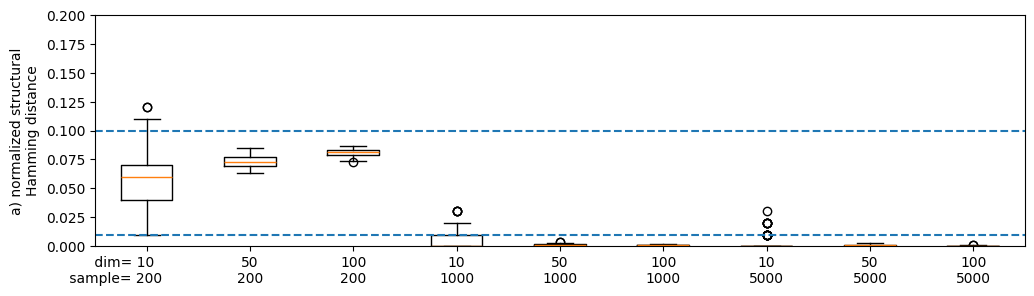

<Figure size 640x480 with 0 Axes>

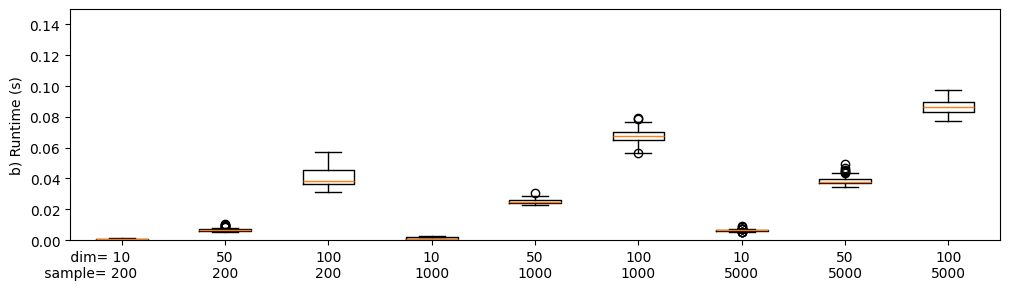

In [66]:
#plot costs
import matplotlib.pyplot as plt
fig = plt.figure()
xticklabels=[' dim= 10           \n sample= 200               ',\
             '50\n200','100\n200','10\n1000','50\n1000','100\n1000','10\n5000','50\n5000','100\n5000']
plt.figure(figsize=(12, 3))
bp = plt.boxplot(np.array(HD).T,labels=xticklabels)
axes = plt.gca()
left, right = axes.get_xlim()
axes.hlines(y=[0.01,0.1], xmin=left, xmax=right, linestyles='dashed')
plt.ylim(0,0.2)
plt.ylabel('a) normalized structural\nHamming distance')
plt.show()


fig = plt.figure()
xticklabels=[' dim= 10           \n sample= 200               ',\
             '50\n200','100\n200','10\n1000','50\n1000','100\n1000','10\n5000','50\n5000','100\n5000']
plt.figure(figsize=(12, 3))
bp = plt.boxplot(np.array(Tcost).T,labels=xticklabels)
# axes = plt.gca()
# left, right = axes.get_xlim()
# axes.hlines(y=[0.01,0.1], xmin=left, xmax=right, linestyles='dashed')
plt.ylim(0,0.15)
plt.ylabel('b) Runtime (s)')
plt.show()

# case 7 (data with cross-correlated noise):

In [67]:
# case 7 (data with cross-correlated noise):

# -*- coding: utf-8 -*-
"""
Created on Sun Dec 31 15:03:43 2023
To generate the cross-correlated noise, we use the functions (var_to_tsdata, var_specrad, var_decay, genvar) which are all rewritten based on the Matlab script of MVGC matlab toolbox by Barnett and Seth:
Barnett, L., and A. K. Seth, 2014: The MVGC multivariate Granger causality toolbox: A new approach to Granger-causal inference. J. Neurosci. Methods, 223, 50–68, https://doi.org/10.1016/j.jneumeth.2013.10.018
@author: Yinen
"""

import numpy as np
from LK_Info_Flow import multi_causality_est
from scipy.linalg import eig  
from scipy.linalg import cholesky  
import scipy.io as scio

def var_to_tsdata(A, SIG, m, N=1, mtrunc=None, decayfac=100):  
    if len(A.shape) == 1:  
        n = A.shape[0]  
        A = np.array([A])  
    else:  
        n = A.shape[1]  
  
    if mtrunc is None:  
        if decayfac is None:  
            decayfac = 100  
        rho = var_specrad(A)  
        assert rho < 1, 'unstable VAR'
        mtrunc = int((np.log(np.finfo(float).eps) - decayfac) / np.log(rho))  # enough time for autocovariance to decay to fp accuracy (and then some)  
    else:  
        assert np.isscalar(mtrunc) and np.isinteger(mtrunc) and mtrunc >= 0, 'mtrunc parameter must be a non-negative integer'
    try:
        C = cholesky(SIG, lower=True)  
    except:
        print( 'covariance matrix not positive-definite')  

    if N > 1:  # multi-trial  
        X = np.zeros((n, m, N))  
        E = np.zeros((n, m, N))  
        for r in range(N):  
            X[:, :, r], E[:, :, r] = genvar(A, C @ np.random.randn(n, m + mtrunc), mtrunc)  
        
    else:  # single trial  
        X, E = genvar(A, C @ np.random.randn(n, m + mtrunc), mtrunc)  
    return X, E, mtrunc

  
def var_specrad(A, newrho=None):  
    A_shape = A.shape  
    if len(A_shape)==2:
        A=A.reshape([A_shape[0],A_shape[1],1])
    n, n1, p = A.shape  
    assert n1 == n, 'VAR coefficients matrix has bad shape'  
    pn1 = (p-1)*n  
    if pn1!=0:
    # construct VAR coefficients for 1-lag problem  
        A1 = np.concatenate((A.reshape(n, p*n), np.eye(pn1), np.zeros((pn1, n))), axis=1)  
    else:
        A1 = A.reshape(n, p*n)
  
    # calculate spectral radius  
    eig_A,_ = eig(A1)
    rho = max(np.abs(eig_A))  
  
    if newrho is None or len(newrho) == 0:  
        #assert len(rho) <= 1, 'too many output parameters'  
        return rho  
    else:  
        return var_decay(A, newrho/rho), rho  # adjusted coefficients, previous value of spectral radius

def var_decay(A, dfac):  
    p = A.shape[2]  # Assuming A is a 3D numpy array  
    f = dfac  
    for k in range(p):  
        A[:, :, k] *= f  # Multiply each slice of A by f  
        f *= dfac  # Update f  
    return A  # Return modified A

def genvar(A, E, trunc=0):  
    assert np.isrealobj(A) and (A.ndim == 2 or A.ndim == 3), 'VAR coefficients must be a 2D or 3D matrix'  
    assert np.isrealobj(E) and E.ndim == 2, 'Residuals covariance must be a row vector or 2D matrix'  
    if A.ndim == 2:
        n1, n2 = A.shape
        A=A.reshape([n1,n2,1])
    n1, n2, p = A.shape  
    n, m = E.shape  
      
    assert n1 == n2, 'VAR coefficients blocks not square'  
    assert n1 == n,  'Residuals covariance matrix doesn''t match VAR coefficients matrix'  
    assert trunc >= 0 & trunc < m,'bad truncation'
      
    X = E.copy()  # Initialize X as a copy of E  
      
    for t in range(p+1, m):  
        for k in range(1, p+1):  
            X[:, t] = X[:, t] + np.dot(A[:, :, k-1], X[:, t-k])  # Update X using the VAR coefficients  
    if trunc >= 0 and trunc < m:  
        X = X[:, trunc+1:]  # Truncate X  
        if len(E.shape) == 2:  
            E = E[:, trunc+1:]  # Truncate E if it's a matrix  
            
    return X, E  # Return X and E (if there are more than one output argument)



if __name__=='__main__':
    NT = 100000  
    # Case 1  
    AT1 = [[0.5, -0.5], [-0.0, 0.6]]  
    
    # Case 2  
    AT2 = [[-0.5, 0.5], [-0.2, 0.5]]  
    
    # Case 3  
    AT3 = [[0.5, -0.2], [-0.5, 0.25]]  
    
    # Case 4  
    AT4 = [[0.25, -0.1], [-0.2, 0.1]]

    AT=np.array(AT1)



    j = 1  
    CE_3d=[];CX_3d=[];NIF_3d=[];IFs_3d=[];p_3d=[];SEIF_3d=[]
    for i in np.arange(-0.5, 0.5, 0.01):#tqdm(np.arange(-0.5, 0.5, 0.01)):  
        #print('%.2f'%i)  
        SIFT = np.array([[0.5, i], [i, 0.5]])    
        X, E, _ = var_to_tsdata(AT, SIFT, NT)
      
        CE_3d.append(np.corrcoef(E))
        CX_3d.append(np.corrcoef(X))
      
        cau = multi_causality_est(X)  
        NIF_3d.append(cau['nIF'])
        p_3d.append(cau['p'])
        SEIF_3d.append(cau['SEIF'])
        IFs_3d.append(cau['IF'])
      
        j += 1

    scio.savemat('data_1.mat',{'CX': CX_3d, 'CE': CE_3d,'NIF': NIF_3d})




case 7 (data with cross-correlated noise):


100%|██████████| 100/100 [00:16<00:00,  6.00it/s]


(-0.2, 1.5)

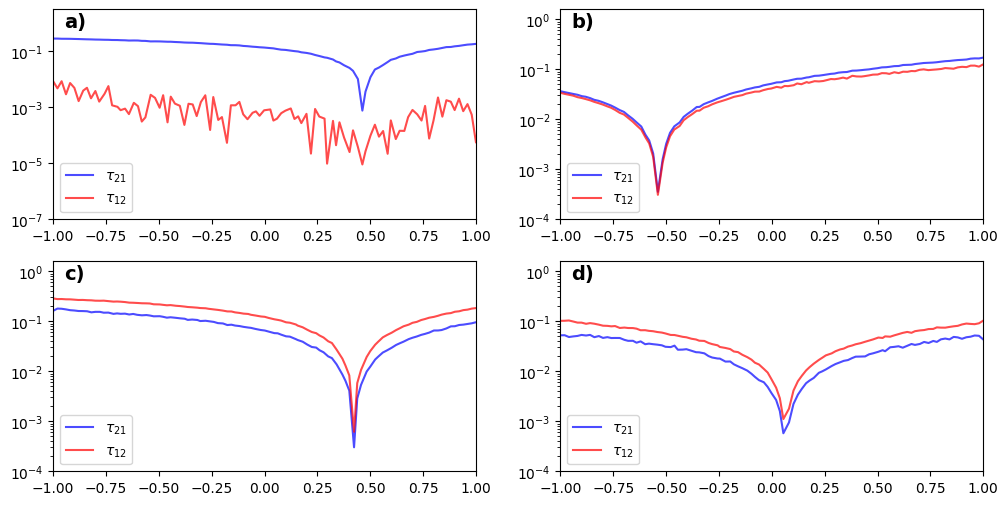

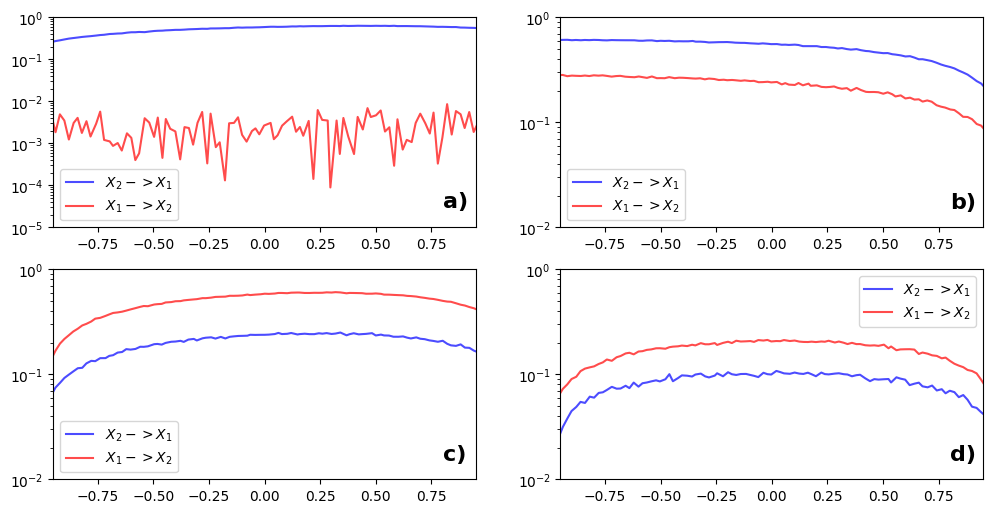

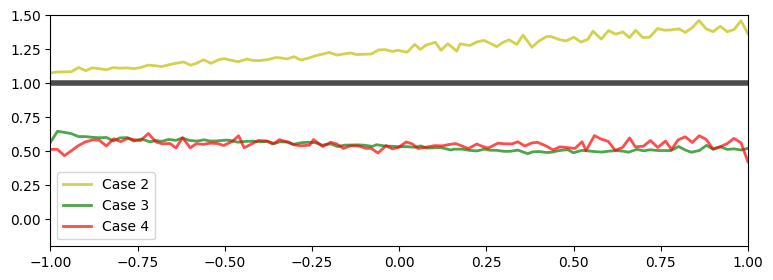

In [68]:
## plot 
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,6), dpi=100)

text_xy=[-0.95, 0.7]
texts=['a)','b)','c)','d)']
ylim=[[10**(-7),10**0.5],[10**(-4),10**0.2],[10**(-4),10**0.2],[10**(-4),10**0.2]]

# normalized IF
for i in range(4):
    data1=scio.loadmat('data_'+str(i+1)+'.mat')
    C=data1['CE']
    x=C[:,0,1]
    NIF=data1['NIF']
    y1=abs(NIF[:,0,1])
    y2=abs(NIF[:,1,0])
    plt.subplot(221+i)
    #plot
    plt.semilogy(x, y1, lw=1.5, c='b', alpha=0.7)
    plt.semilogy(x, y2, lw=1.5, c='r', alpha=0.7)
    plt.legend([r'$\tau_{21}$',r'$\tau_{12}$'],loc='lower left')
    plt.xlim([-1,1])
    plt.ylim(ylim[i])
    plt.text(text_xy[0],text_xy[1],texts[i],fontdict=dict(fontsize=14, color='k',weight='bold'))


# effect size
fig=plt.figure(figsize=(12,6), dpi=100)

text_y=[0.00003,0.015,0.015,0.015]
ylim=[[1e-5,1],[1e-2,1],[1e-2,1],[1e-2,1]]
for i in range(4):
    data1=scio.loadmat('data'+str(i+1)+'.mat')
    C=data1['CE']
    x=C[0,1]
    dIF=abs(data1['IF']/data1['SEIF']/np.sqrt(NT))  #effect size
    y1=abs(dIF[0,1])
    y2=abs(dIF[1,0])
    
    plt.subplot(221+i)
    plt.semilogy(x, y1, lw=1.5, c='b', alpha=0.7)
    plt.semilogy(x, y2, lw=1.5, c='r', alpha=0.7)
    plt.text(0.8,text_y[i],texts[i],         fontdict=dict(fontsize=16, color='k',
                           #family='monospace',#fontsize 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
                           weight='bold',#'light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'
                          
                          )
    )
    plt.legend([r'$X_2->X_1$',r'$X_1->X_2$'])
    plt.ylim(ylim[i])
    plt.xlim([-0.95,0.95])



# relative importance of IF(X2->X1)/IF(X1->X2)
fig=plt.figure(figsize=(9,3), dpi=100)
color=['b','y','g','r']
for i in range(1,4):
    data1=scio.loadmat('data'+str(i+1)+'.mat')
    C=data1['CE']
    x=C[0,1]
    NIF=data1['NIF']
    y1=abs(NIF[0,1])
    y2=abs(NIF[1,0])
    #plt.subplot(221+i)
    #绘图命令
    plt.plot(x, y1/y2, lw=2, c=color[i], alpha=0.7)


plt.legend([r'Case 2',r'Case 3',r'Case 4'])
plt.plot([-1,1], [1 ,1], lw=4, c='k', alpha=0.7)
plt.xlim([-1,1])
plt.ylim([-0.2,1.5])


# case 8(temperal varying):

In [69]:
# case 8(temperal varying):
import numpy as np
from tqdm import tqdm
from LK_Info_Flow import multi_causality_est
a11=0.3;a12=-0.4;a22=0.7;a21=0;b1=0.4;b2=0.5;
x=np.zeros([100000,])
y=np.zeros([100000,])
x[0]=0.4;y[0]=0.3;
for i in range(50000-1):
    x[i+1]=a11*x[i]+a21*y[i]+b1*np.random.uniform(-1,1);
    y[i+1]=a12*x[i]+a22*y[i]+b2*np.random.uniform(-1,1);

print ("x(i+1)=%.2f * x(i) + %.2f * y(i) + %.2f W" % (a11, a21,b1))
print ("y(i+1)=%.2f * x(i) + %.2f * y(i) + %.2f W" % (a12, a22,b2))

a11=0.3;a12=0.0;a22=0.7;a21=0.3;b1=0.4;b2=0.5;
for i in range(50000-1,100000-1):
    x[i+1]=a11*x[i]+a21*y[i]+b1*np.random.uniform(-1,1);
    y[i+1]=a12*x[i]+a22*y[i]+b2*np.random.uniform(-1,1);

print ("x(i+1)=%.2f * x(i) + %.2f * y(i) + %.2f W" % (a11, a21,b1))
print ("y(i+1)=%.2f * x(i) + %.2f * y(i) + %.2f W" % (a12, a22,b2))




print('caculating:')
window_size=1000;
T=np.zeros([100000,]);E99=np.zeros([100000,]);T1=np.zeros([100000,]);E991=np.zeros([100000,])
for i in tqdm(range(10000,90000)):
    tmp=np.zeros([2,window_size*2]);
    tmp[0]=x[i-window_size:i+window_size];
    tmp[1]=y[i-window_size:i+window_size];
    cau=multi_causality_est(tmp);
    T21=cau['IF'].squeeze();
    e99=cau['err_e90'].squeeze();
    T[i]=T21[0,1];E99[i]=e99[0,1];
    T1[i]=T21[1,0];E991[i]=e99[1,0];




x(i+1)=0.30 * x(i) + 0.00 * y(i) + 0.40 W
y(i+1)=-0.40 * x(i) + 0.70 * y(i) + 0.50 W
x(i+1)=0.30 * x(i) + 0.30 * y(i) + 0.40 W
y(i+1)=0.00 * x(i) + 0.70 * y(i) + 0.50 W
caculating:


100%|██████████| 80000/80000 [00:35<00:00, 2246.86it/s]


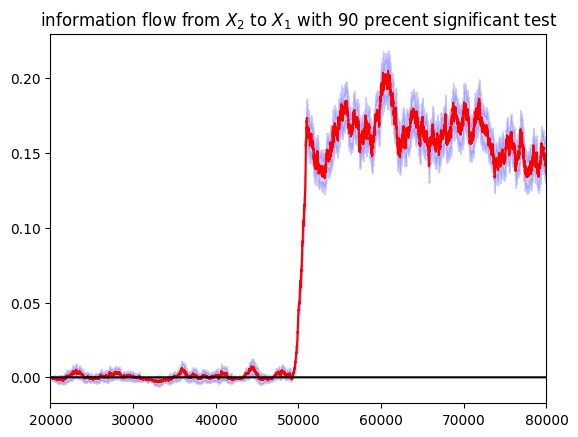

In [70]:


from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
plt.plot(np.arange(20000,80001),  T[20000:80001],color='r')
plt.plot(np.arange(20000,80001),  np.zeros([60001,]),color='k')
plt.fill_between(np.arange(20000,80001),
                 T[20000:80001]-E99[20000:80001],
                 T[20000:80001]+E99[20000:80001],
                 color='b',
                 alpha=0.2)
plt.xlim([20000,80000])
plt.title('information flow from $X_2$ to $X_1$ with 90 precent significant test')
plt.show()